In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn
import math

from IPython.display import display

%matplotlib inline

In [5]:
pd.options.display.max_rows = 15
train = pd.read_csv('data/train.csv', index_col='PassengerId')
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [123]:
survived_and_cabin_known = train[['Cabin', 'Survived', 'Sex']][~train.Cabin.isnull()][train.Survived == True]
survived_and_cabin_unknown = train[['Cabin', 'Survived', 'Sex']][train.Cabin.isnull()][train.Survived == True]

not_survived_and_cabin_known = train[['Cabin', 'Survived']][~train.Cabin.isnull()][train.Survived == False]
not_survived_and_cabin_unknown = train[['Cabin', 'Survived']][train.Cabin.isnull()][train.Survived == False]

mens_survived_cabin_known = survived_and_cabin_known[survived_and_cabin_known.Sex == 'male']
womens_survived_cabin_known = survived_and_cabin_known[survived_and_cabin_known.Sex == 'female']
cabins_known = train[~train.Cabin.isnull()]

def get_length_by_sector(dataset: list, sector: str) -> int:
    return len([i for i in dataset if i.startswith(sector)])

# 204 кабини общо:
# - A - 15
# - B - 47
# - C - 59
# - D - 33
# - E - 32
# - F - 13
# - G - 4
survived = cabins_known[cabins_known.Survived == True]
died = cabins_known[cabins_known.Survived == False]

print("За тези с известни кабини:")

print("Оцелели / загинали по сектори: ")
print("Общо: {} / {}".format(len(cabins_known[cabins_known.Survived==True]), len(cabins_known[cabins_known.Survived==False])))
for sector in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    print("Сектор {}: {} / {}".format(sector,
                                      get_length_by_sector(list(survived['Cabin']), sector),
                                      get_length_by_sector(list(died['Cabin']), sector)))

# мъже/жени над 18 години от оцелелите
print("\nПроцент оцелели Мъже / Жени над 18 години по сектори: ")

men = cabins_known[cabins_known.Sex == 'male'][cabins_known.Age >= 18]
survived_men = men[men.Survived == True]

women = cabins_known[cabins_known.Sex == 'female'][cabins_known.Age >= 18]
survived_women = women[women.Survived == True]

print("Общо: {} / {}".format((len(survived_men) / len(men)) * 100, (len(survived_women) / len(women)) * 100))

for sector in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    men_by_sector = get_length_by_sector(list(men['Cabin']), sector)
    survived_men_by_sector = get_length_by_sector(list(survived_men['Cabin']), sector)
    women_by_sector = get_length_by_sector(list(women['Cabin']), sector)
    survived_women_by_sector = get_length_by_sector(list(survived_women['Cabin']), sector)
    if women_by_sector == 0:
        print("В сектор {} няма жени... пропускаме го".format(sector))
        continue

    if men_by_sector == 0:
        print("В сектор {} няма мъже... пропускаме го".format(sector))
        continue

    print("Сектор {}: Мъже({}): {} | Жени({}): {}".format(
        sector,
        men_by_sector,
        (survived_men_by_sector / men_by_sector) * 100,
        women_by_sector,
        (survived_women_by_sector / women_by_sector) * 100))

# процент на оцелели от децата по сектори
print("\nПроцент оцелели деца(под 18 години) по сектори: ")
kids = cabins_known[cabins_known.Age <= 18]
print("Общо: {}".format((len(kids) / len(cabins_known)) * 100))
survived_kids = survived[survived.Age <= 18]

for sector in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    kids_by_sector = get_length_by_sector(kids['Cabin'], sector)
    survived_kids_by_sector = get_length_by_sector(survived_kids['Cabin'], sector)
    print("Процент оцелели деца от сектор {} (от {} ): {}".format(
        sector,
        kids_by_sector,
        (survived_kids_by_sector / kids_by_sector) * 100
    ))
    
# Само в сектор C не са се спасили всички деца. Да видим класите
print("Първа класа: ", get_length_by_sector(kids[kids.Pclass == 1]['Cabin'], 'C'))
print("Втора класа: ", get_length_by_sector(kids[kids.Pclass == 2]['Cabin'], 'C'))
print("Трета класа: ", get_length_by_sector(kids[kids.Pclass == 3]['Cabin'], 'C'))
# и 6те деца са били в първа класа
print()
# Тогава да видим цялото разпределение в сектор C
print("Първа класа: ", get_length_by_sector(cabins_known[cabins_known.Pclass == 1]['Cabin'], 'C'))
print("Втора класа: ", get_length_by_sector(cabins_known[cabins_known.Pclass == 2]['Cabin'], 'C'))
print("Трета класа: ", get_length_by_sector(cabins_known[cabins_known.Pclass == 3]['Cabin'], 'C'))

# Кабините на загиналите
print([d for d in died['Cabin'] if d.startswith('C')])
print([d for d in died['Cabin'] if d.startswith('C')])


За тези с известни кабини:
Оцелели / загинали по сектори: 
Общо: 136 / 68
Сектор A: 7 / 8
Сектор B: 35 / 12
Сектор C: 35 / 24
Сектор D: 25 / 8
Сектор E: 24 / 8
Сектор F: 8 / 5
Сектор G: 2 / 2

Процент оцелели Мъже / Жени над 18 години по сектори: 
Общо: 37.93103448275862 / 94.9367088607595
Сектор A: Мъже(10): 50.0 | Жени(1): 100.0
Сектор B: Мъже(18): 38.88888888888889 | Жени(21): 100.0
Сектор C: Мъже(24): 25.0 | Жени(23): 91.30434782608695
Сектор D: Мъже(14): 42.857142857142854 | Жени(16): 100.0
Сектор E: Мъже(16): 56.25 | Жени(13): 92.3076923076923
Сектор F: Мъже(4): 0.0 | Жени(3): 100.0
В сектор G няма мъже... пропускаме го

Процент оцелели деца(под 18 години) по сектори: 
Общо: 11.27450980392157
Процент оцелели деца от сектор A (от 1 ): 100.0
Процент оцелели деца от сектор B (от 7 ): 100.0
Процент оцелели деца от сектор C (от 6 ): 66.66666666666666
Процент оцелели деца от сектор D (от 1 ): 100.0
Процент оцелели деца от сектор E (от 2 ): 100.0
Процент оцелели деца от сектор F (от 4 )

/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFra

In [135]:
data = original.copy()
data['Age'] = data.Age.fillna(data.Age.mean())

X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

In [136]:
X

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.000000,1,0,7.2500
2,1,38.000000,1,0,71.2833
3,3,26.000000,0,0,7.9250
4,1,35.000000,1,0,53.1000
5,3,35.000000,0,0,8.0500
6,3,29.699118,0,0,8.4583
7,1,54.000000,0,0,51.8625
...,...,...,...,...,...
885,3,25.000000,0,0,7.0500


In [137]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
6      0
7      0
      ..
885    0
886    0
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

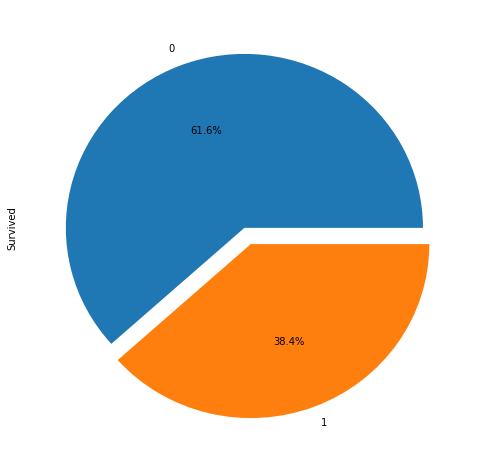

In [138]:
y.value_counts().plot.pie(explode=[0, 0.1], figsize=(8, 8), autopct='%1.1f%%');


In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)


In [140]:
y_train.mean()

0.38323353293413176

In [141]:
y_test.mean()

0.38565022421524664

In [142]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.708083832335
test score:  0.695067264574


In [143]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.943113772455
test score:  0.686098654709


In [144]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]})
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

,rank_test_score,mean_test_score,params
14,1,0.735129,"{'n_estimators': 100, 'max_depth': 6}"
8,2,0.727273,"{'n_estimators': 70, 'max_depth': 4}"
9,2,0.727273,"{'n_estimators': 100, 'max_depth': 4}"
12,2,0.727273,"{'n_estimators': 50, 'max_depth': 6}"
11,5,0.726150,"{'n_estimators': 30, 'max_depth': 6}"
7,5,0.726150,"{'n_estimators': 50, 'max_depth': 4}"
10,5,0.726150,"{'n_estimators': 10, 'max_depth': 6}"
13,5,0.726150,"{'n_estimators': 70, 'max_depth': 6}"
6,9,0.722783,"{'n_estimators': 30, 'max_depth': 4}"
18,10,0.720539,"{'n_estimators': 70, 'max_depth': 8}"


In [145]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
14,0.150110,0.011381,0.735129,0.797419,6,100,"{'n_estimators': 100, 'max_depth': 6}",1,0.696970,0.824916,0.734007,0.794613,0.774411,0.772727,0.002633,0.000608,0.031625,0.021398
8,0.109216,0.007519,0.727273,0.756453,4,70,"{'n_estimators': 70, 'max_depth': 4}",2,0.676768,0.776094,0.730640,0.759259,0.774411,0.734007,0.003473,0.000207,0.039934,0.017296
9,0.147971,0.010885,0.727273,0.758137,4,100,"{'n_estimators': 100, 'max_depth': 4}",2,0.680135,0.782828,0.734007,0.754209,0.767677,0.737374,0.003604,0.000740,0.036055,0.018763
12,0.076910,0.005774,0.727273,0.791807,6,50,"{'n_estimators': 50, 'max_depth': 6}",2,0.703704,0.814815,0.720539,0.792929,0.757576,0.767677,0.001478,0.000137,0.022503,0.019260
11,0.045528,0.003742,0.726150,0.791807,6,30,"{'n_estimators': 30, 'max_depth': 6}",5,0.690236,0.823232,0.727273,0.786195,0.760943,0.765993,0.000168,0.000059,0.028877,0.023702
7,0.086091,0.007302,0.726150,0.759820,4,50,"{'n_estimators': 50, 'max_depth': 4}",5,0.680135,0.784512,0.723906,0.760943,0.774411,0.734007,0.012697,0.001365,0.038521,0.020634
10,0.017292,0.001844,0.726150,0.793490,6,10,"{'n_estimators': 10, 'max_depth': 6}",5,0.686869,0.835017,0.730640,0.771044,0.760943,0.774411,0.000682,0.000089,0.030407,0.029396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,0.017503,0.001927,0.696970,0.913019,12,10,"{'n_estimators': 10, 'max_depth': 12}",29,0.680135,0.936027,0.696970,0.897306,0.713805,0.905724,0.000110,0.000143,0.013746,0.016628
33,0.115698,0.008930,0.695847,0.959596,15,70,"{'n_estimators': 70, 'max_depth': 15}",30,0.690236,0.959596,0.696970,0.961279,0.700337,0.957912,0.001891,0.000010,0.004199,0.001375


In [146]:
model = RandomForestClassifier(max_depth=6, n_estimators=100, random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.782934131737
test score:  0.713004484305


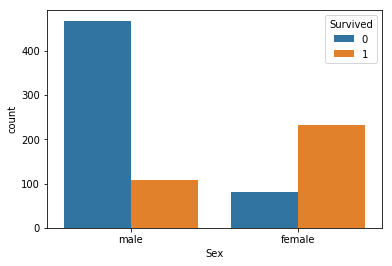

In [147]:
sns.countplot('Sex', hue='Survived', data=data);

In [148]:
ages = original[['Survived', 'Age']]
ages = ages[~ages.Age.isnull()]
ages.Age = ages.Age.apply(lambda x: (x // 5) * 5)
ages.groupby('Age').mean()

,Survived
Age,
0.0,0.675000
5.0,0.500000
10.0,0.437500
15.0,0.395349
20.0,0.342105
25.0,0.358491
30.0,0.421053
...,...
45.0,0.390244


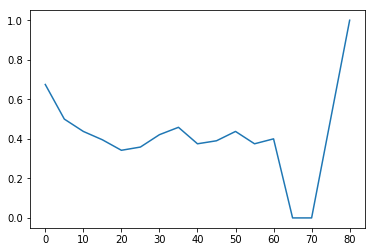

In [149]:
plt.plot(ages.groupby('Age').mean());

In [150]:
original[original.Age >= 70][['Survived', 'Name', 'Age']].sort_values(by='Age', ascending=False)

,Survived,Name,Age
PassengerId,,,
631,1,"Barkworth, Mr. Algernon Henry Wilson",80.0
852,0,"Svensson, Mr. Johan",74.0
97,0,"Goldschmidt, Mr. George B",71.0
494,0,"Artagaveytia, Mr. Ramon",71.0
117,0,"Connors, Mr. Patrick",70.5
673,0,"Mitchell, Mr. Henry Michael",70.0
746,0,"Crosby, Capt. Edward Gifford",70.0


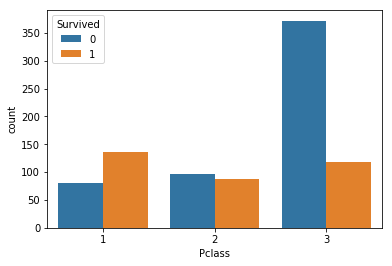

In [151]:
sns.countplot('Pclass', hue='Survived', data=original);

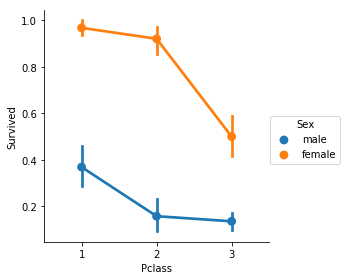

In [152]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=original);

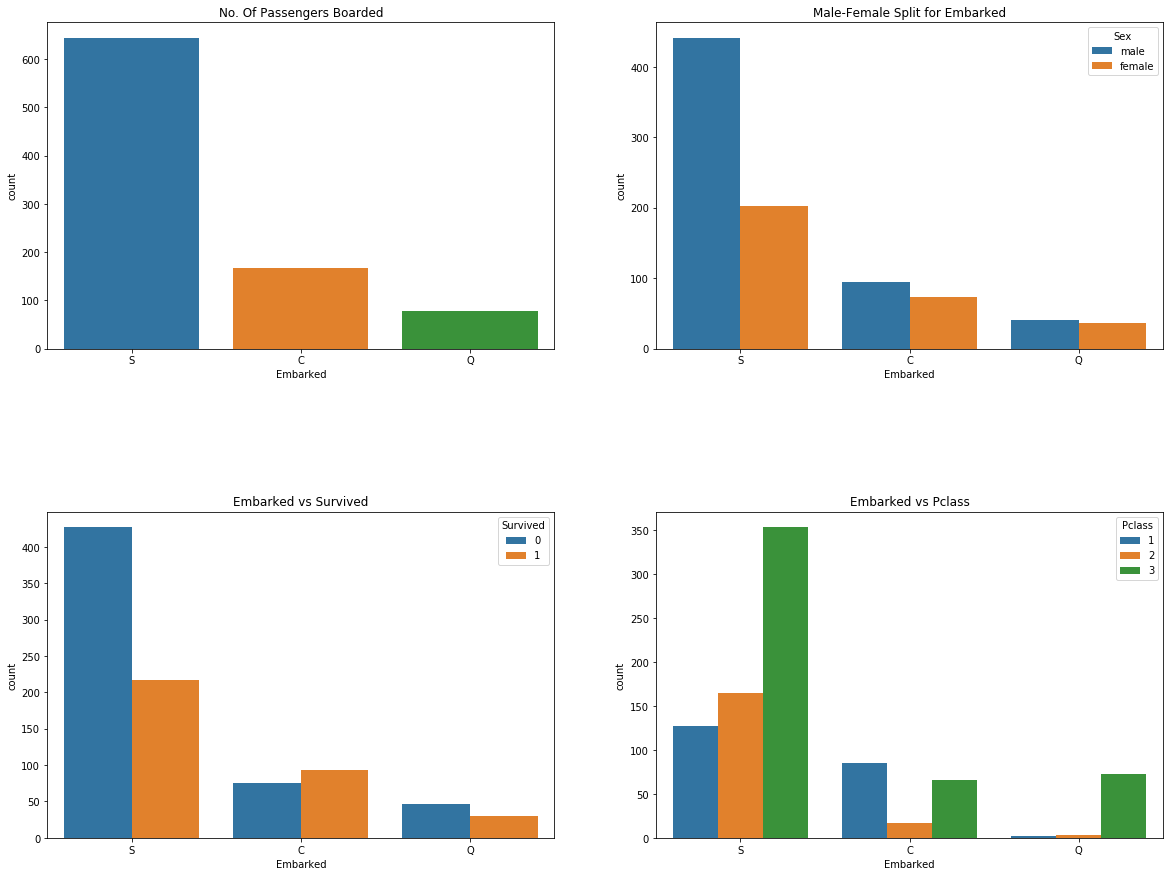

In [29]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=original, ax=ax[0,0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=original, ax=ax[0,1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=original, ax=ax[1,0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=original, ax=ax[1,1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

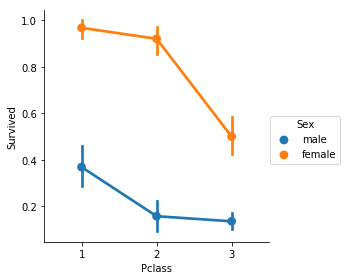

In [153]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=original);

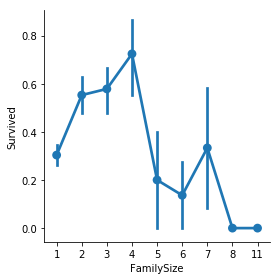

In [154]:
data = original.copy()
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
sns.factorplot('FamilySize', 'Survived', data=data);